In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [ ]:
np.random.seed(0)

In [ ]:
df=pd.read_csv("hyd_cleaned_data.csv")

In [ ]:
df.dtypes

,0
Unnamed: 0,object
Price,float64


In [ ]:
df['Unnamed: 0']=pd.to_datetime(df['Unnamed: 0'])

In [ ]:
df.dtypes

,0
Unnamed: 0,datetime64[ns]
Price,float64


In [ ]:
df.set_index('Unnamed: 0',inplace=True)

In [ ]:
df.head()

,Price
Unnamed: 0,
2024-01-01,1360000.0
2024-01-02,9200000.0
2024-01-03,6700000.0
2024-01-04,1650000.0
2024-01-05,2680000.0


In [ ]:
df.shape

(366, 1)

In [ ]:
def stationary_test(dataframe,column):
  dataframe['rolling_mean']=dataframe[column].rolling(window=12).mean().shift(1)
  dataframe['rolling_std']=dataframe[column].rolling(window=12).std().shift(1)
  adftest=adfuller(dataframe[column],autolag=None)
  stats=pd.Series(adftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(stats)
  for key,value in adftest[4].items():
    print('\n Critical Values:')
    print(f'   {key}, {value}')
  dataframe.dropna(inplace=True)
  sns.lineplot(data=dataframe.dropna(),x=dataframe.index,y=column)
  sns.lineplot(data=dataframe.dropna(),x=dataframe.index,y='rolling_mean')
  sns.lineplot(data=dataframe.dropna(),x=dataframe.index,y='rolling_std')
  plt.xticks(rotation=90)
  plt.legend()

In [ ]:
stationary_test(df,'Price')

In [ ]:
df1=df.copy()
df1['Price_Diff']=df1['Price']-df1['Price'].shift(1)
df1.dropna(inplace=True)
stationary_test(df1,'Price_Diff')

In [ ]:
df2=df.copy()
df2['Price_Log']=np.log(df2['Price'])
df2.dropna(inplace=True)
stationary_test(df2,'Price_Log')

In [ ]:
df3=df.copy()
df3['Price_Sqrt']=np.sqrt(df3['Price'])
df3.dropna(inplace=True)
stationary_test(df3,'Price_Sqrt')

In [ ]:
df4=df.copy()
df4['Price_Sqrt']=np.cbrt(df4['Price'])
df4.dropna(inplace=True)
stationary_test(df4,'Price_Sqrt')

In [ ]:
df5=df.copy()
df5['Price_Log']=np.log(df5['Price'])
df5['Price_Log_Sqrt']=np.sqrt(df5['Price_Log'])
df5.dropna(inplace=True)
stationary_test(df5,'Price_Log_Sqrt')

In [ ]:
df6=df.copy()
df6['Price_Log']=np.log(df6['Price'])
df6['Price_Log_Shift']=df6['Price_Log']-df6['Price_Log'].shift(1)
df6.dropna(inplace=True)
stationary_test(df6,'Price_Log_Shift')

In [ ]:
df7=df.copy()
df7['Price_Log']=np.log(df7['Price'])
df7['Price_Log_Cbrt']=np.cbrt(df7['Price_Log'])
df7.dropna(inplace=True)
stationary_test(df7,'Price_Log_Cbrt')

In [ ]:
df12=df.copy()
df12['Price_Sqrt']=np.sqrt(df12['Price'])
df12['Price_Sqrt_Log']=np.log(df12['Price_Sqrt'])
df12.dropna(inplace=True)
stationary_test(df12,'Price_Sqrt_Log')

In [ ]:
df13=df.copy()
df13['Price_Cbrt']=np.cbrt(df13['Price'])
df13['Price_Cbrt_Log']=np.log(df13['Price_Cbrt'])
df13.dropna(inplace=True)
stationary_test(df13,'Price_Cbrt_Log')

In [ ]:

df_model=df.copy()
df_model['Price_Diff']=df_model['Price']-df_model['Price'].shift(1)
df_model['Price_Log']=np.log(df_model['Price'])
df_model['Price_Sqrt']=np.sqrt(df_model['Price'])
df_model['Price_Cbrt']=np.cbrt(df_model['Price'])
df_model['Price_Log_Sqrt']=np.sqrt(df_model['Price_Log'])
df_model['Price_Log_Shift']=df_model['Price_Log']-df_model['Price_Log'].shift(1)
df_model['Price_Log_Cbrt']=np.cbrt(df_model['Price_Log'])
df_model['Price_Detrend']=df_model['Price']-df_model['Price'].mean()
df_model['Price_Log_Detrend']=df_model['Price_Log']-df_model['Price_Log'].mean()
df_model['Price_Sqrt_Detrend']=df_model['Price_Sqrt']-df_model['Price_Sqrt'].mean()
df_model['Price_Cbrt_Detrend']=df_model['Price_Cbrt']-df_model['Price_Cbrt'].mean()
df_model['Price_Sqrt_Log']=np.log(df_model['Price_Sqrt'])
df_model['Price_Cbrt_Log']=np.log(df_model['Price_Cbrt'])
df_model.dropna(inplace=True)


In [ ]:
sns.lineplot(x=df.index,y=df['Price'])
plt.xticks(rotation=90)

In [ ]:
train=df_model.iloc[:293]
test=df_model.iloc[293:]

In [ ]:
model = auto_arima(df_model['Price_Diff'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Diff'].dropna())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12123.832, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=12039.046, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11997.601, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=3.66 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11979.036, Time=0.08 sec


In [ ]:
model1=ARIMA(train['Price_Diff'].dropna(),order=(5,0,0))
model1=model1.fit()
arima_pred=model1.predict(start=len(train),end=len(train)+len(test)-1)
test['arimaPred1']=arima_pred.values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-658-8e5c797c2285>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred1']=arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Diff'], test['arimaPred1'])
mse = mean_squared_error(test['Price_Diff'], test['arimaPred1'])
rmse = np.sqrt(mse)
aic=model1.aic
bic=model1.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 2752510.98627338 MSE 12211050709814.648 RMSE 3494431.385764306  AIC 9611.623076602289 BIC 9637.38428486541


In [ ]:
model1=ARIMA(df_model['Price_Diff'].dropna(),order=(5,0,0))
model1=model1.fit()
forecast_steps=365
predictions=model1.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
last_known_price = df_model['Price'].iloc[-1]
predicted_prices = []
for pred in predictions.values:
    last_known_price += pred
    predicted_prices.append(last_known_price)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


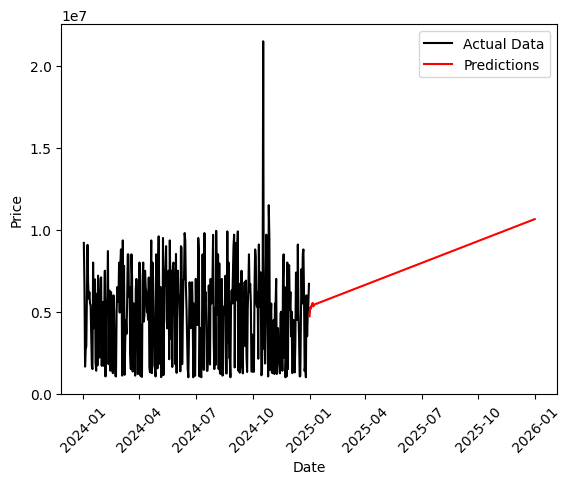

In [ ]:
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
model = auto_arima(df_model['Price_Log'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Log'].dropna())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3023.570, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2555.143, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2215.482, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1986.885, Time=0.31 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1825.596, Time=0.60 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=1686.041, Time=0.67 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.63 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.86 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.19 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.0

In [ ]:
model2 = ARIMA(train['Price_Log'].dropna(), order=(0,0,5))
model2 = model2.fit()
arima_pred = model2.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred2'] = arima_pred.values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-663-6407c375e095>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred2'] = arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Log'], test['arimaPred2'])
mse = mean_squared_error(test['Price_Log'], test['arimaPred2'])
rmse = np.sqrt(mse)
aic=model2.aic
bic=model2.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.6374449266057829 MSE 0.5694752003212992 RMSE 0.7546358064134641 AIC 659.5845636205911 BIC 685.3457718837105


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


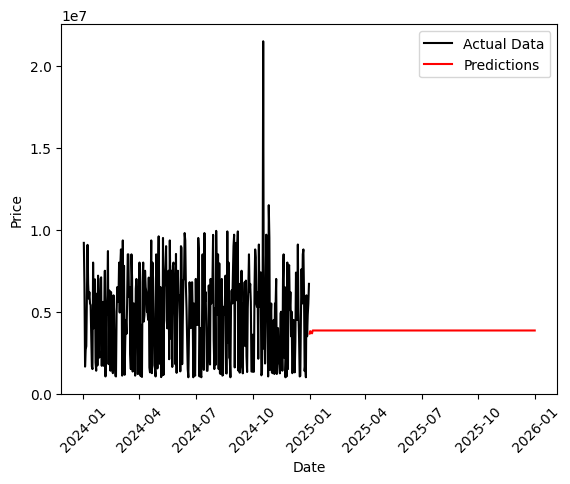

In [ ]:
model2=ARIMA(df_model['Price_Log'].dropna(),order=(0,0,5))
model2=model2.fit()
forecast_steps=365
predictions=model2.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = np.exp(pred)
    predicted_prices.append(t)
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:5]

[3662580.7805089206,
 3812633.00856993,
 3734637.4339097724,
 3710638.25119766,
 3683175.792816559]

In [ ]:
model = auto_arima(df_model['Price_Sqrt'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Sqrt'].dropna())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6656.301, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6394.761, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=6267.372, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=6196.352, Time=0.33 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=6138.195, Time=0.39 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=6106.653, Time=0.52 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6025.303, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.86 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5952.592, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.33 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=591

In [ ]:
model3 = ARIMA(train['Price_Sqrt'].dropna(), order=(4,0,0))
model3 = model3.fit()
arima_pred = model3.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred3'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Sqrt'], test['arimaPred3'])))
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
forecast_steps = 365
predictions = model3.forecast(steps=forecast_steps)
predicted_prices = []
for pred in predictions.values:
    t = pred**2
    predicted_prices.append(t)

688.8899061432692


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-668-b4f957738338>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred3'] = arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Sqrt'], test['arimaPred3'])
mse = mean_squared_error(test['Price_Sqrt'], test['arimaPred3'])
rmse = np.sqrt(mse)
aic=model3.aic
bic=model3.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 580.2098284490377 MSE 474569.30278608226 RMSE 688.8899061432692  AIC 4670.348703884327 BIC 4692.429739538429


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


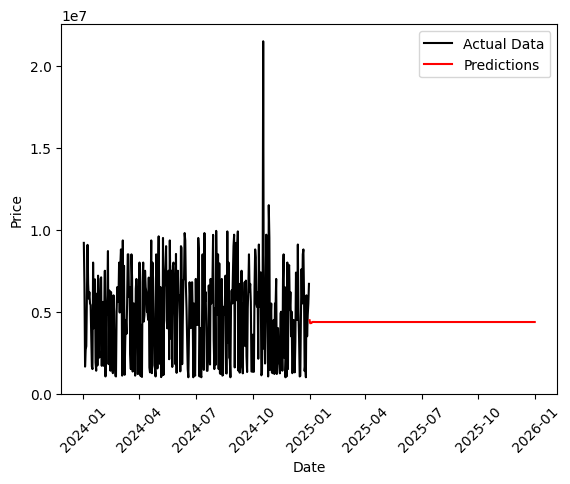

In [ ]:
model3=ARIMA(df_model['Price_Sqrt'].dropna(),order=(4,0,0))
model3=model3.fit()
forecast_steps=365
predictions=model3.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = pred**2
    predicted_prices.append(t)
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:5]

[4481989.203289026,
 4295536.982266767,
 4313607.171062993,
 4308071.140576351,
 4367239.493718794]

In [ ]:
model=auto_arima(df_model['Price_Cbrt'].dropna(),seasonal=False,trace=True,stepwise=False)
model=model.fit(df_model['Price_Cbrt'].dropna())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4767.478, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4445.947, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4270.033, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=4178.518, Time=0.21 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=4100.999, Time=0.60 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=4054.328, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3897.180, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.75 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3819.401, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf

In [ ]:
model4=ARIMA(train['Price_Cbrt'].dropna(),order=(2,0,0))
model4=model4.fit()
arima_pred=model4.predict(start=len(train),end=len(train)+len(test)-1)
test['arimaPred4']=arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Cbrt'],test['arimaPred4'])))


37.05451482062933


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-673-e584a6e1582b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred4']=arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Cbrt'], test['arimaPred4'])
mse = mean_squared_error(test['Price_Cbrt'], test['arimaPred4'])
rmse = np.sqrt(mse)
aic=model4.aic
bic=model4.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 31.286685104800124 MSE 1373.0370685922385 RMSE 37.05451482062933 AIC 2950.9871788073215 BIC 2965.7078692433897


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


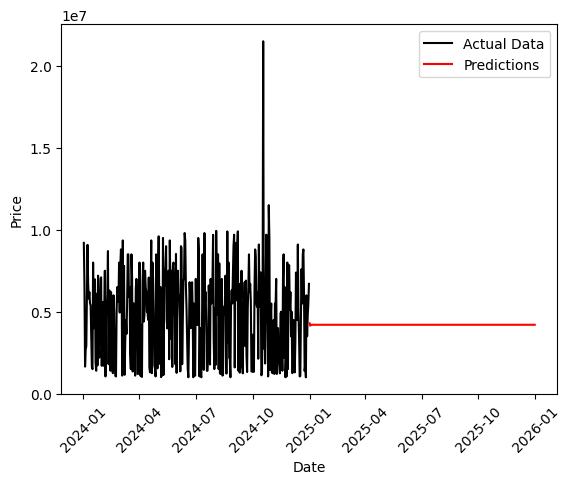

In [ ]:
model4=ARIMA(df_model['Price_Cbrt'].dropna(),order=(2,0,0))
model4=model4.fit()
forecast_steps=365
future_dates=pd.date_range(start='2025-01-01',periods=forecast_steps,freq='D')
predictions=model4.forecast(steps=forecast_steps)
predicted_prices=[]
for pred in predictions.values:
  t=pred**3
  predicted_prices.append(t)
plt.plot(df_model.index,df_model['Price'],label='Actual Data',color="black")
plt.plot(future_dates,predicted_prices,label='Predictions',color='red')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:5]

[4294770.956731542,
 4149537.6888647955,
 4197624.3567337105,
 4204495.992923561,
 4203545.831885505]

In [ ]:
model=auto_arima(df_model['Price_Log_Sqrt'].dropna(),seasonal=False,trace=True,stepwise=False)
model=model.fit(df_model['Price_Log_Sqrt'].dropna())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2030.268, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1163.657, Time=0.38 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=852.849, Time=1.17 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=666.865, Time=0.65 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=482.011, Time=1.81 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-644.297, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-653.722, Time=0.52 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-649.095, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-631.863, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.18 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=i

In [ ]:
model5=ARIMA(train['Price_Log_Sqrt'].dropna(),order=(1,0,3))
model5=model5.fit()
arima_pred=model5.predict(start=len(train),end=len(train)+len(test)-1)
test['arimaPred5']=arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Log_Sqrt'],test['arimaPred5'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


0.0968926400423876


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-678-c2fe185ae59a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred5']=arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Log_Sqrt'], test['arimaPred5'])
mse = mean_squared_error(test['Price_Log_Sqrt'], test['arimaPred5'])
rmse = np.sqrt(mse)
aic=model5.aic
bic=model5.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.0823610921040946 MSE 0.00938818369438369 RMSE 0.0968926400423876  AIC -544.1589447356703 BIC -522.0779090815679


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


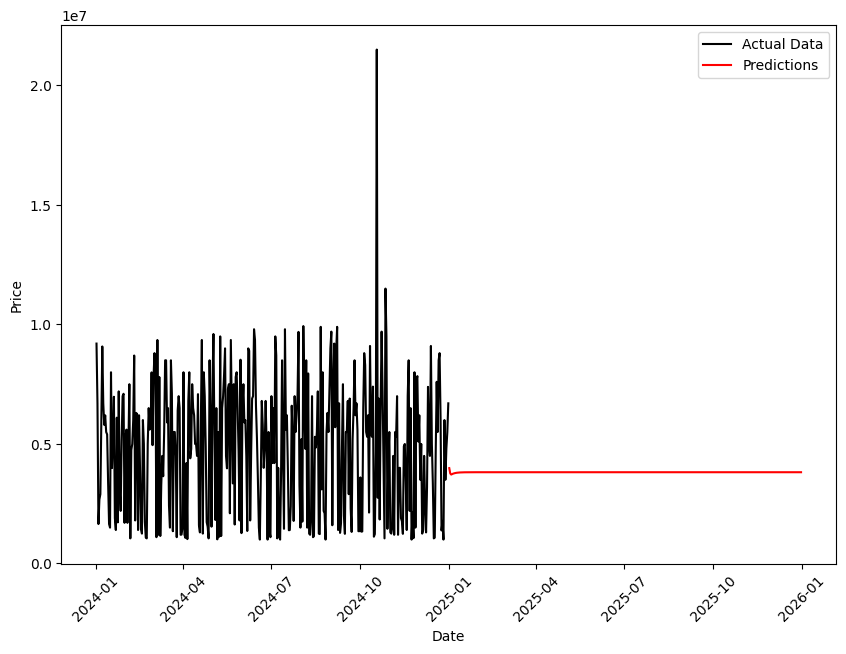

In [ ]:
model5=ARIMA(df_model['Price_Log_Sqrt'].dropna(),order=(1,0,3))
model5=model5.fit()
forecast_steps=365
future_dates=pd.date_range(start='2025-01-01',periods=forecast_steps,freq='D')
predictions=model5.forecast(steps=forecast_steps)
predicted_prices=[]
for pred in predictions.values:
  t=np.exp(pred**2)
  predicted_prices.append(t)
plt.figure(figsize=(10,7))
plt.plot(df_model.index,df_model['Price'],label='Actual Data',color="black")
plt.plot(future_dates,predicted_prices,label='Predictions',color='red')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:2]

[3989272.9417486503, 3767994.461383589]

In [ ]:
model = auto_arima(df_model['Price_Log_Cbrt'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Log_Cbrt'].dropna())


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1699.357, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=802.438, Time=1.09 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=459.812, Time=0.79 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=246.064, Time=1.34 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=40.628, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1283.093, Time=0.43 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1270.412, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-1234.048, Time=0.30 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-1240.993, Time=0.54 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1249.630, Time=0.45 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0]            

In [ ]:
model6 = ARIMA(train['Price_Log_Cbrt'].dropna(), order=(1,0,1))
model6 = model6.fit()
arima_pred = model6.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred6'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Log_Cbrt'], test['arimaPred6'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


0.04128585602625413


<ipython-input-683-b60cb833ba2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred6'] = arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Log_Cbrt'], test['arimaPred6'])
mse = mean_squared_error(test['Price_Log_Cbrt'], test['arimaPred6'])
rmse = np.sqrt(mse)
aic=model6.aic
bic=model6.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.03481792208568237 MSE 0.0017045219078205842 RMSE 0.04128585602625413  AIC -1043.362205493831 BIC -1028.6415150577627


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


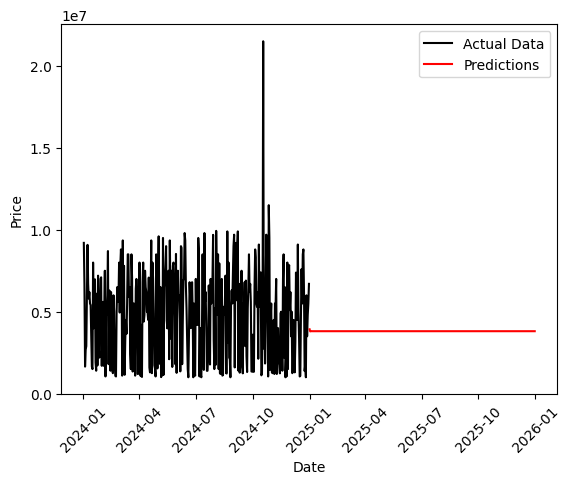

In [ ]:

model6=ARIMA(df_model['Price_Log_Cbrt'].dropna(),order=(1,0,1))
model6=model6.fit()
forecast_steps=365
predictions=model6.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = np.exp(pred**3)
    predicted_prices.append(t)
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:5]

[3927419.826814876,
 3797291.7115942095,
 3812728.9387331763,
 3810865.5007203626,
 3811089.9687543004]

In [ ]:
model = auto_arima(df_model['Price_Sqrt_Log'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Sqrt_Log'].dropna())


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2517.573, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2049.145, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1709.485, Time=0.26 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1480.888, Time=0.27 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1319.598, Time=0.30 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=1180.043, Time=0.86 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=3.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.79 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.97 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.88 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.92 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.1

In [ ]:
model7 = ARIMA(train['Price_Sqrt_Log'].dropna(), order=(0,0,5))
model7 = model7.fit()
arima_pred = model7.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred7'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Sqrt_Log'], test['arimaPred7'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


0.3773175047928264


<ipython-input-688-4a461d3fa486>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred7'] = arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Sqrt_Log'], test['arimaPred7'])
mse = mean_squared_error(test['Price_Sqrt_Log'], test['arimaPred7'])
rmse = np.sqrt(mse)
aic=model7.aic
bic=model7.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.3187230043885897 MSE 0.14236849942308455 RMSE 0.3773175047928264 AIC 253.40031590318233 BIC 279.1615241663018


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


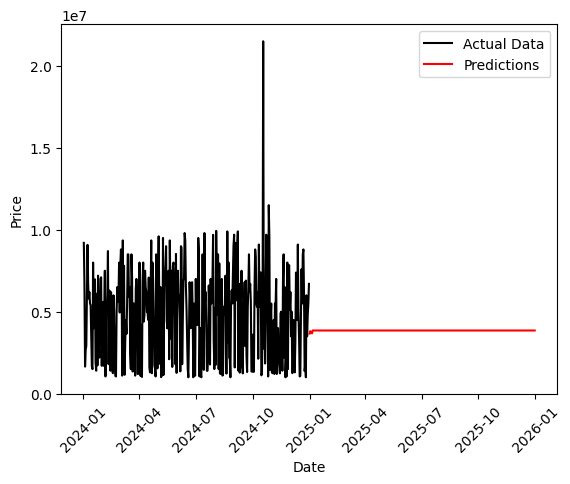

In [ ]:

model7=ARIMA(df_model['Price_Sqrt_Log'].dropna(),order=(0,0,5))
model7=model7.fit()
forecast_steps=365
predictions=model7.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = (np.exp(pred))**2
    predicted_prices.append(t)
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:2]

[3662556.396509906, 3812615.47566349]

In [ ]:
model = auto_arima(df_model['Price_Cbrt_Log'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Cbrt_Log'].dropna())


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2221.583, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1753.156, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1413.495, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1184.898, Time=0.22 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1023.609, Time=0.27 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=884.054, Time=0.69 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.74 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.93 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=32.072, Time=0.45 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.75 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0

In [ ]:
model8 = ARIMA(train['Price_Cbrt_Log'].dropna(), order=(2,0,1))
model8 = model8.fit()
arima_pred = model8.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred8'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Cbrt_Log'], test['arimaPred8'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


0.24940756502111172


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-693-af7378a10a87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred8'] = arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Cbrt_Log'], test['arimaPred8'])
mse = mean_squared_error(test['Price_Cbrt_Log'], test['arimaPred8'])
rmse = np.sqrt(mse)
aic=model8.aic
bic=model8.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.21175455582115285 MSE 0.062204133489760075 RMSE 0.24940756502111172 AIC 8.659333098840806 BIC 27.06019614392614


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


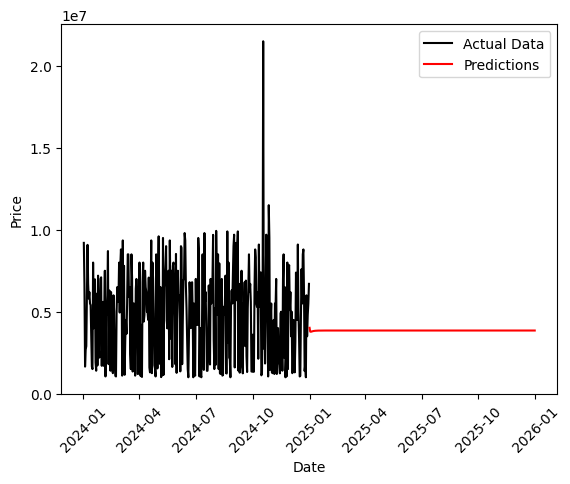

In [ ]:

model8=ARIMA(df_model['Price_Cbrt_Log'].dropna(),order=(2,0,1))
model8=model8.fit()
forecast_steps=365
predictions=model8.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = (np.exp(pred))**3
    predicted_prices.append(t)
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:2]

[4017568.220106752, 3786620.373598059]

**Model 1**

* MAE 2752510.98627338
* MSE 12211050709814.648
* RMSE 3494431.385764306  
* AIC 9611.623076602289
* BIC 9637.38428486541

**Model 2**

* MAE 0.6374449266057829
* MSE 0.5694752003212992
* RMSE 0.7546358064134641
* AIC 659.5845636205911
* BIC 685.3457718837105

**Model 3**

* MAE 580.2098284490377
* MSE 474569.30278608226
* RMSE 688.8899061432692  
* AIC 4670.348703884327
* BIC 4692.429739538429

**Model 4**

* MAE 31.286685104800124
* MSE 1373.0370685922385
* RMSE 37.05451482062933
* AIC 2950.9871788073215
* BIC 2965.7078692433897

**Model 5**

* MAE 0.0823610921040946
* MSE 0.00938818369438369
* RMSE 0.0968926400423876  
* AIC -544.1589447356703
* BIC -522.0779090815679

**Model 6**

* MAE 0.03481792208568237
* MSE 0.0017045219078205842
* RMSE 0.04128585602625413  
* AIC -1043.362205493831
* BIC -1028.6415150577627

**Model 7**

* MAE 0.3187230043885897
* MSE 0.14236849942308455
* RMSE 0.3773175047928264
* AIC 253.40031590318233
* BIC 279.1615241663018

**Model 8**

* MAE 0.21175455582115285
* MSE 0.062204133489760075
* RMSE 0.24940756502111172
* AIC 8.659333098840806
* BIC 27.06019614392614

Model 6 is the best performing model